In [1]:
import argparse,os
import pandas as pd
import os.path as osp
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
K = 150

In [195]:
def histogram_intersection(h1, h2):
    set1 = set(h1[:K])
    set2 = set(h2[:K])
    commonElems = len(set1.intersection(set2))
    return commonElems/K

In [196]:
def plotCorrelationPlots(featureDF,feature):
    corr = featureDF.corr(method=histogram_intersection)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f = plt.figure(figsize=(45, 35))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(250, 20, as_cmap=True)
    #cmap = sns.color_palette("Greens", as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=False, linewidths=.5, cbar_kws={"shrink": 0.8})
    #g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 35)
    #ax.figure.axes[-1].yticks.set_size(150)
    #print(ax.figure.axes[-1].yaxis.get_major_ticks())
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=55,label2On='bold')

    plt.xticks(rotation=90,weight='bold',fontsize=35)
    plt.yticks(rotation=0,weight='bold',fontsize=35)
    for tick in cbar.ax.yaxis.get_major_ticks():
        #print(tick.label)
        tick.label.set_fontweight('bold')
    plt.savefig(feature+"_correlation.png",fmt='png',bbox_to_inches='tight')
    featureDF.to_csv(feature+".csv",index=False)

In [13]:
def computeCorrelationCoeffs(dfDict):
    desList = dfDict.keys()
    areaDF = None
    for i,des in enumerate(desList):
        dfList = dfDict[des]
        areaSIDrank = dfList[0]["sid"]
        #print(areaSIDrank)
        if areaDF is None:
            areaDF = pd.DataFrame({des : areaSIDrank.to_list()})
        else:
            #areaDF.insert(i,des,areaSIDrank)
            #print(areaSIDrank)
            areaDF[des] = areaSIDrank.to_list()
    #plotCorrelationPlots(areaDF,'area')
    #plotCorrelationPlots(delayDF,'delay')
    #plotCorrelationPlots(adpDF,'ADP')
    plotCorrelationPlots(areaDF,'AND')

In [197]:
INPUT_CSV_FOLDER = "/home/abc586/OPENABC_DATASET/graphml/postProcessing/final"

In [198]:
csvFiles = glob.glob(osp.join(INPUT_CSV_FOLDER,"*.csv"))
dfDict = {}
for csv_file in csvFiles:
        #print(csv_file)
    desName = osp.basename(csv_file).split("processed_")[-1].split(".csv")[0]
    df = pd.read_csv(csv_file)
    df['desName'] = desName
    df_area = df.sort_values(['AND'],ascending=True)
    dfDict[desName] = [df_area]
    #df['ADP'] = df['area']*df['delay']
    #df['AIGcells'] = df['AND']+df['NOT']

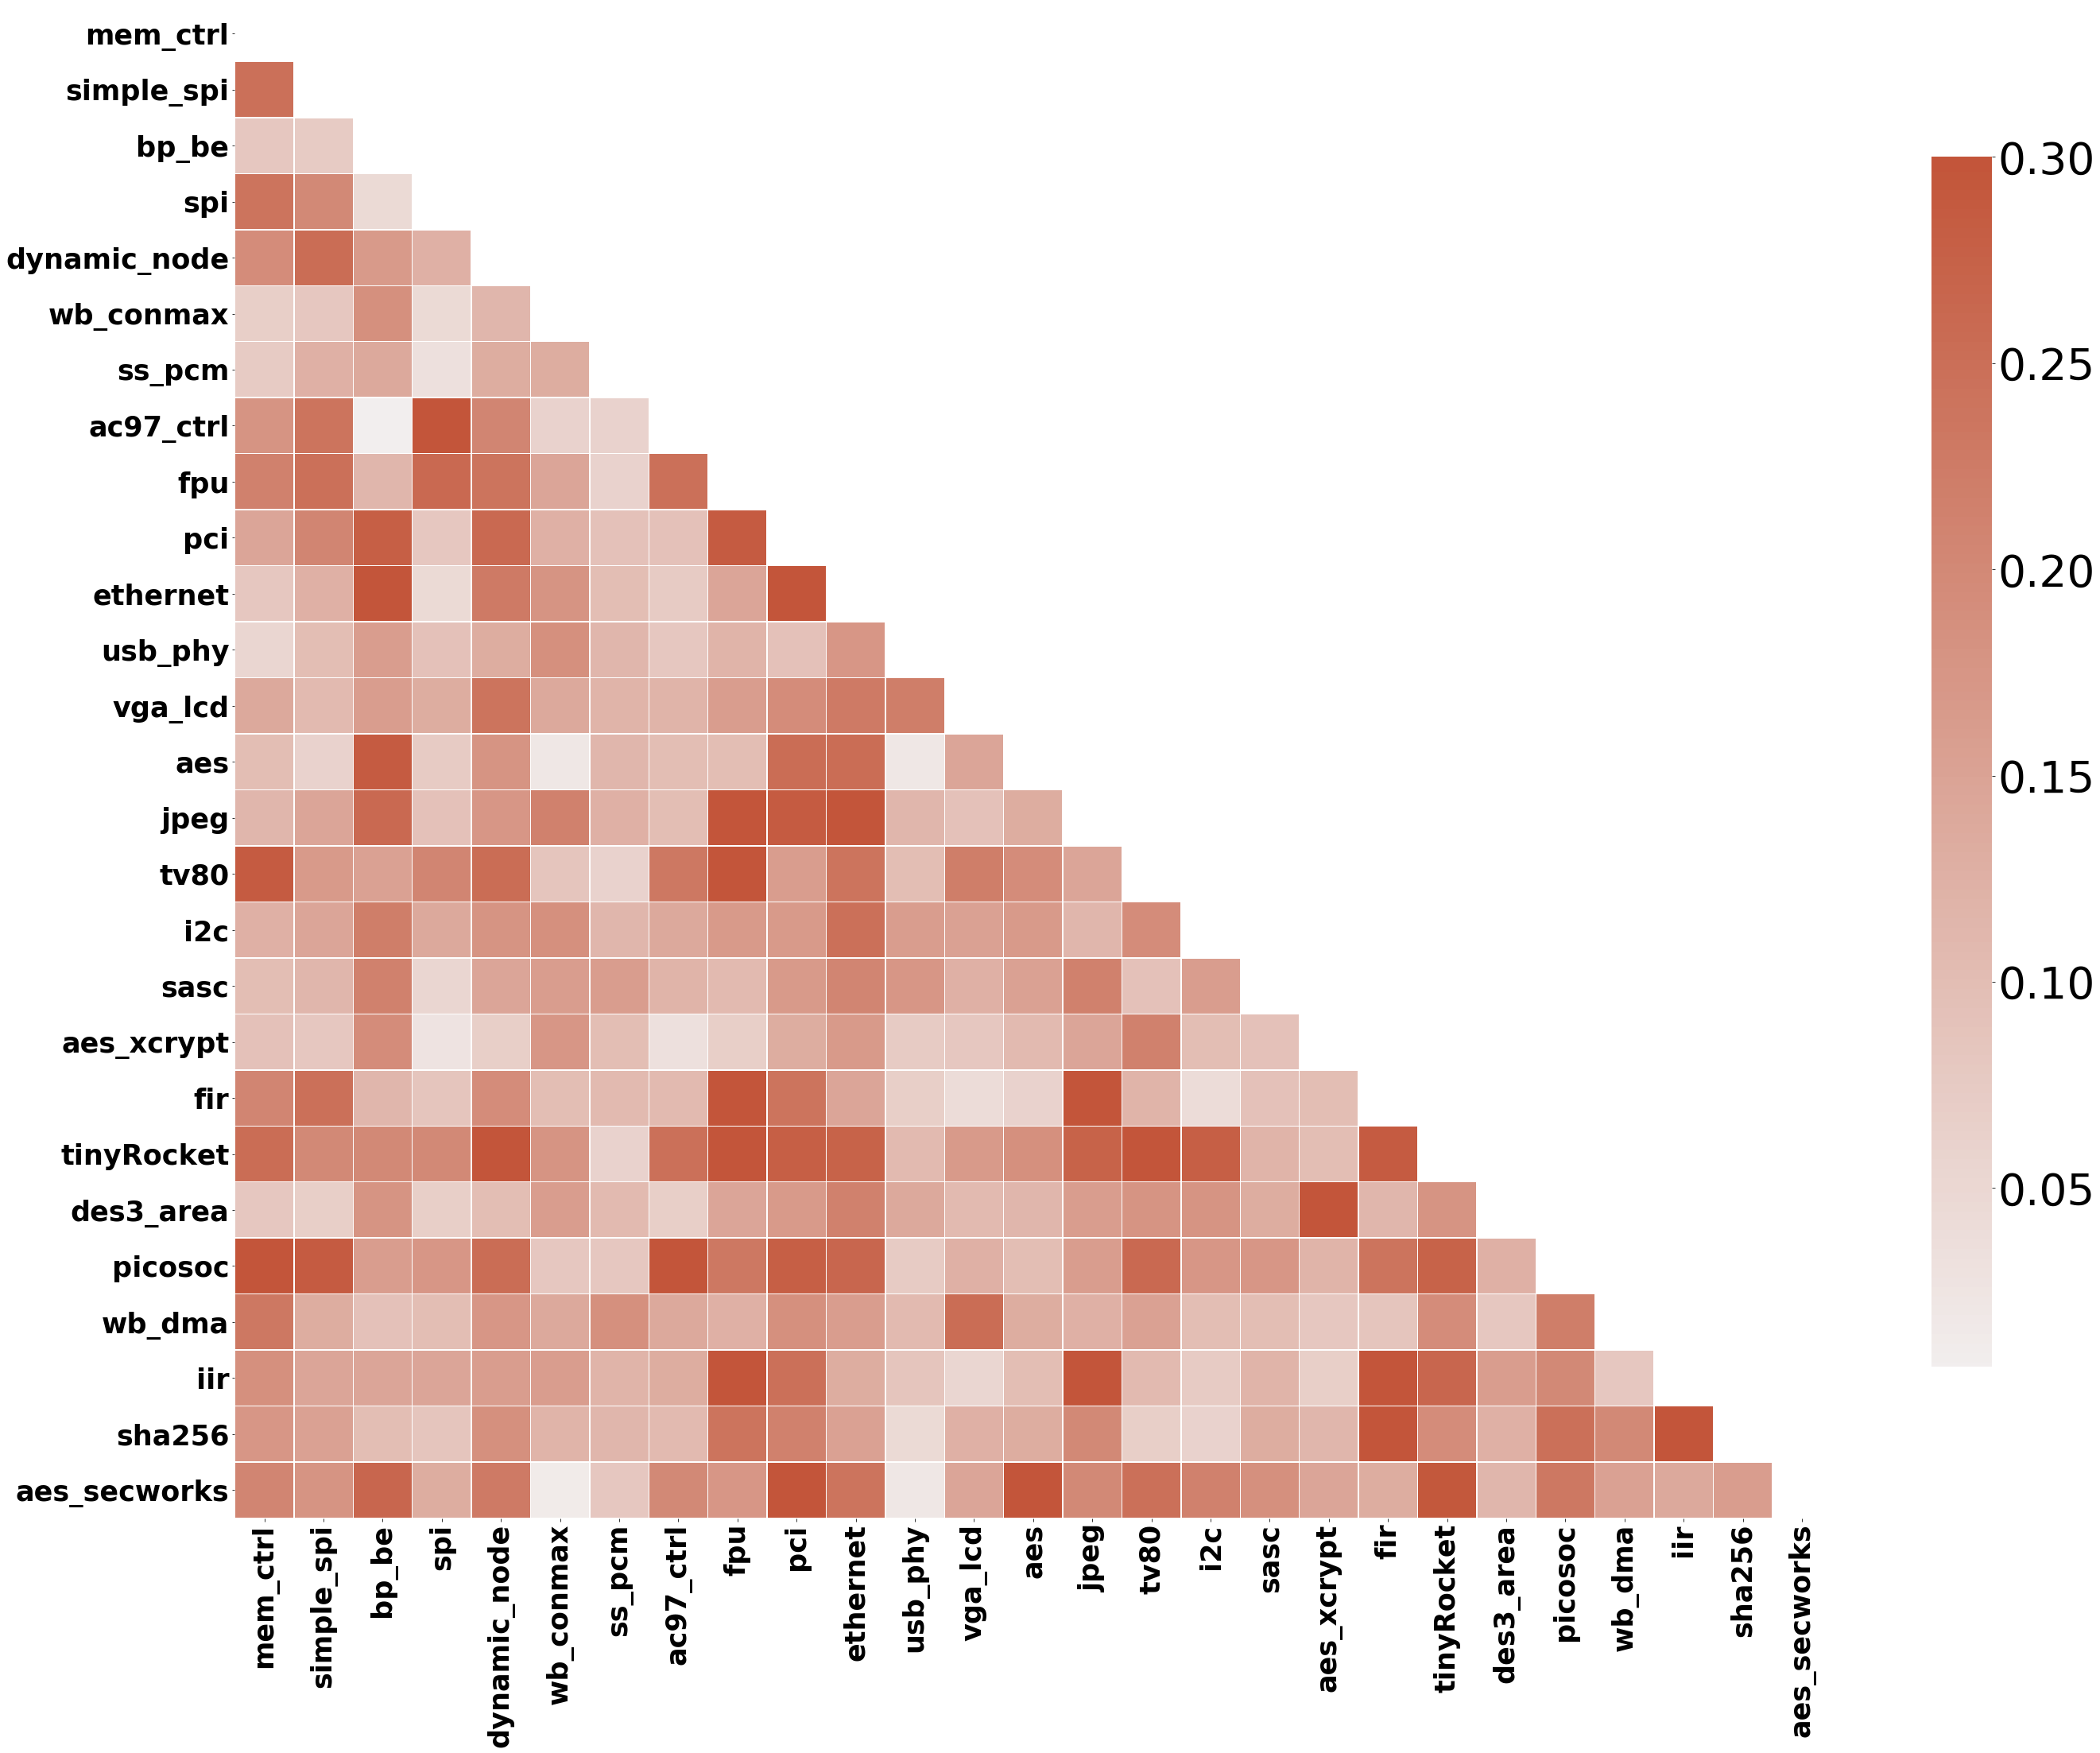

In [201]:
computeCorrelationCoeffs(dfDict)